Pipeline com diferentes métodos de normalização e escalonamento no scikit-learn:

MSE (Erro Médio Quadrático): 1407.19
R² (Coeficiente de Determinação): 0.92


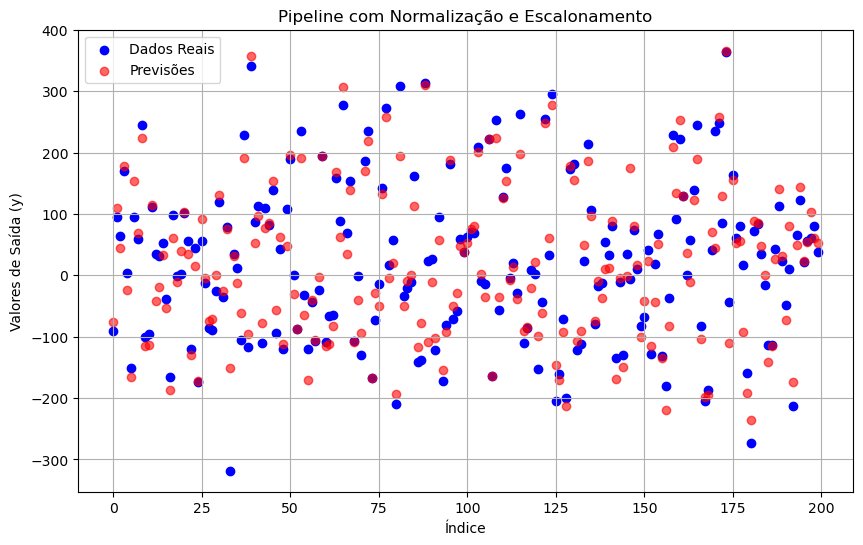

In [2]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Explicação inicial
print("Pipeline com diferentes métodos de normalização e escalonamento no scikit-learn:\n")

# Gerando dados sintéticos para regressão com ruído e valores ausentes
X, y = make_regression(n_samples=1000, n_features=3, noise=25, random_state=42)
# Adicionando valores ausentes
rng = np.random.default_rng(42)
missing_indices = rng.choice(X.size, size=100, replace=False)
X.ravel()[missing_indices] = np.nan

# Dividindo os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando transformações para colunas específicas
preprocessor = ColumnTransformer([
    ('scaling', StandardScaler(), [0]),  # Escalonamento padrão na primeira feature
    ('minmax', MinMaxScaler(), [1]),     # MinMax na segunda feature
    ('robust', RobustScaler(), [2])     # RobustScaler na terceira feature
])

# Criando o pipeline completo
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Imputação de valores ausentes
    ('scalers', preprocessor),                   # Aplicação de diferentes escalonadores
    ('model', Ridge(alpha=1.0))                  # Modelo de regressão Ridge
])

# Treinando o pipeline
pipeline.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred = pipeline.predict(X_test)

# Métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE (Erro Médio Quadrático): {mse:.2f}")
print(f"R² (Coeficiente de Determinação): {r2:.2f}")

# Visualizando os resultados
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Dados Reais')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Previsões', alpha=0.6)
plt.title("Pipeline com Normalização e Escalonamento")
plt.xlabel("Índice")
plt.ylabel("Valores de Saída (y)")
plt.legend()
plt.grid(True)
plt.show()
